In [1]:
#!pip install obspy
#! pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.segy.core import _read_segy

In [3]:

filename = 'Viking_graben/seismic.H@' #data

with open(filename, 'rb') as f:
    data = np.fromfile(f, dtype=np.float32)
#array = np.reshape(data, [11000, 11000])

#filename_info = r'/g100/home/usera06upi/a06upi0e/thesis/data/Viking_Graben/dataGeom.raw' #geometry

#with open(filename_info, 'rb') as f:
    #data_info = np.fromfile(f, sep="",dtype=int)
    
#filename_wavelet = r'/g100/home/usera06upi/a06upi0e/thesis/data/Viking_Graben/FarField.dat' #wavelet

#with open(filename_wavelet, 'rb') as f:
    #wavelet = np.fromfile(f, dtype=np.float32)
    
#filename_segy= r'/g100/home/usera06upi/a06upi0e/thesis/data/Viking_Graben/seismic.segy' #segy

#with open(filename_segy, 'rb') as f:
#segy_data  = _read_segy(filename_segy)

In [4]:
!which devito

/usr/bin/which: no devito in (/home/farchid/miniconda3/envs/seismic_cs300/bin:/sw/rl9g/cuda/11.8/rl9_binary/bin:/home/farchid/assimp-install/bin:/home/farchid/.local/bin:/opt/slurm/puppet/bin:/opt/slurm/cluster/ibex/install-v2/RedHat-9/bin:/opt/slurm/scripts/bin:/usr/lpp/mmfs/bin:/home/farchid/assimp-install/bin:/home/farchid/.local/bin:/opt/slurm/puppet/bin:/opt/slurm/cluster/ibex/install-v2/RedHat-9/bin:/opt/slurm/scripts/bin:/usr/lpp/mmfs/bin:/home/farchid/assimp-install/bin:/home/farchid/.local/bin:/home/farchid/miniconda3/condabin:/home/farchid/.local/bin:/home/farchid/bin:/opt/slurm/puppet/bin:/usr/share/Modules/bin:/opt/slurm/cluster/ibex/install-v2/RedHat-9/bin:/opt/slurm/scripts/bin:/usr/lpp/mmfs/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/slurm/scripts/bin:/opt/puppetlabs/bin:/opt/slurm/scripts/bin:/opt/slurm/scripts/bin)


In [5]:
filename_info = 'Viking_graben/dataGeom.raw' #geometry

with open(filename_info, 'rb') as f:
    data_info = np.fromfile(f, sep="",dtype=np.int32)
data_info

array([ 3237,     0,     0, ...,     0, 28250,     0], dtype=int32)

In [6]:
#cannot read properly with this method

#with open(filename_wavelet, 'rb') as f:
  #  wavelet = np.fromfile(f, dtype=np.float32)#np.float32)
    #wavelet =f.read()
s = b'0xa5'
print(s.decode(' ISO-8859-1'))

0xa5


In [7]:
#import rawpy
#!pip install rawpy

In [8]:
data.shape

(180180000,)

In [9]:
shots=1001
receivers=120
coordinates=4
np.reshape(data_info,(1001,120,4)).shape
data_info=np.reshape(data_info,(shots,receivers,coordinates))

In [10]:
data_info

array([[[ 3237,     0,     0,     0],
        [ 3237,     0,    25,     0],
        [ 3237,     0,    50,     0],
        ...,
        [ 3237,     0,  2925,     0],
        [ 3237,     0,  2950,     0],
        [ 3237,     0,  2975,     0]],

       [[ 3262,     0,    25,     0],
        [ 3262,     0,    50,     0],
        [ 3262,     0,    75,     0],
        ...,
        [ 3262,     0,  2950,     0],
        [ 3262,     0,  2975,     0],
        [ 3262,     0,  3000,     0]],

       [[ 3287,     0,    50,     0],
        [ 3287,     0,    75,     0],
        [ 3287,     0,   100,     0],
        ...,
        [ 3287,     0,  2975,     0],
        [ 3287,     0,  3000,     0],
        [ 3287,     0,  3025,     0]],

       ...,

       [[28462,     0, 25225,     0],
        [28462,     0, 25250,     0],
        [28462,     0, 25275,     0],
        ...,
        [28462,     0, 28150,     0],
        [28462,     0, 28175,     0],
        [28462,     0, 28200,     0]],

       [[28487,

In [11]:
#print('%.12e'% data_info[0][0][0])#*.1*10

In [12]:
#data_info[0][receivers-1][coordinates-2]

In [13]:
#data_info[0][1][2]-data_info[0][0][2] #receiver-receiver distance

In [14]:

#print('%.12e'% (diff_receiver_shot)) #last receiver-shot distance

In [15]:
diff_receiver_shot=data_info[0][0][0]-data_info[0][receivers-1][coordinates-2]

diff=data_info[0][2][2]-data_info[0][1][2] #receiver-receiver distance #2
if data_info[0][1][2]-data_info[0][0][2]==data_info[0][2][2]-data_info[0][1][2]==data_info[1][2][2]-data_info[1][1][2]:
    print(f'Receiver-receiver distance:  {diff}')
    print(f'First receiver-shot distance: {diff_receiver_shot}')
    print(f'Ratio between distances (shot-last receiver and receiver-receiver): {np.divide(diff_receiver_shot,diff)}' )
    print(f'Length of the receiver line: should be {(receivers-1)*diff} equal to {data_info[0][receivers-1][coordinates-2]}' )
    print(f'Length of the line: {(receivers-1)*diff+diff*np.divide(diff_receiver_shot,diff)} ' )
    print(f'Number of receivers: {receivers}' )
    print(f'Number of shots: {shots}' )
    
else:
    print('error')

Receiver-receiver distance:  25
First receiver-shot distance: 262
Ratio between distances (shot-last receiver and receiver-receiver): 10.48
Length of the receiver line: should be 2975 equal to 2975
Length of the line: 3237.0 
Number of receivers: 120
Number of shots: 1001


In [16]:
#ratio between distances (shot-last receiver and receiver-receiver)


In [17]:
data_info[0][0][0]

np.int32(3237)

In [18]:
"{:.3f}".format(data_info[0][0][0])

'3237.000'

In [19]:
time=1500
offset=120
shots=1001
data=np.reshape(data,(shots,offset,time))

Text(0.5, 1.0, 'Label')

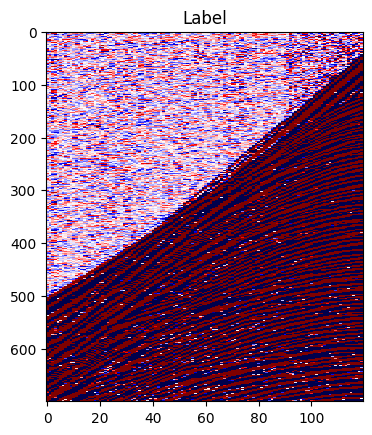

In [20]:
vmin_all = -1
vmax_all = 1

plt.imshow(data[40][:,:700].T.squeeze()-data[40][:,:700].T.squeeze().mean(), 
             aspect=0.2, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
plt.title("Label")

In [21]:
xax=list(range(0,receivers*diff,int(diff))) #*(receivers/10)
tax=list(range(0,time*4,4))

Text(0.5, 1.0, 'Label')

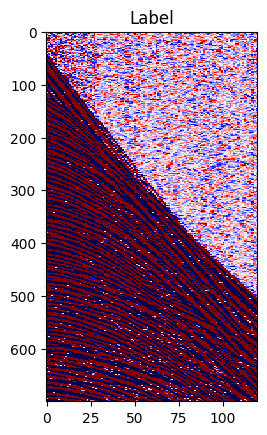

In [22]:
plt.imshow(np.flip(data[40][:,:700].T.squeeze() - data[40][:,:700].T.squeeze().mean(),axis=1), 
             aspect=0.3, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
plt.title("Label")

In [23]:
import numpy as np
from scipy.signal import butter, filtfilt

def lowpass_filter_trace(trace, cutoff_freq, fs, order=2):
    """
    Apply low-pass Butterworth filter to a trace.

    Parameters:
        trace: 1D numpy array (one seismic trace)
        cutoff_freq: cutoff frequency (Hz)
        fs: original sampling rate (Hz)
        order: filter order

    Returns:
        Filtered trace
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, trace)

def downsample_trace(trace, factor):
    return trace[::factor]

def process_seismic_section(section, fs, downsample_factor, cutoff_freq=None):
    """
    Apply low-pass filter and downsample each trace of a seismic section.

    Parameters:
        section: 2D numpy array (n_samples x n_traces)
        fs: original sampling rate (Hz)
        downsample_factor: integer
        cutoff_freq: cutoff frequency (Hz). If None, uses Nyquist of downsampled signal.

    Returns:
        Processed seismic section
    """
    if cutoff_freq is None:
        cutoff_freq = 0.5 * (fs / downsample_factor)

    processed_section = []
    for i in range(section.shape[1]):  # iterate over traces (columns)
        trace = section[:, i]
        filtered = lowpass_filter_trace(trace, cutoff_freq, fs)
        downsampled = downsample_trace(filtered, downsample_factor)
        processed_section.append(downsampled)

    return np.stack(processed_section, axis=1)  # shape: [new_samples, n_traces]

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
def filter_AGC(data,length_filter,exp1=1,exp2=1):
    #length_filter=20
    zeros=np.tile(100000,(120,int(length_filter/2)))
    padded=np.concatenate((zeros,data,zeros),axis=1)
    desired_rms=1.9
    section_gained=np.ones((padded.shape[0],int(padded.shape[1]-length_filter)),dtype=np.float32)
    for elem1,i in enumerate(section_gained):
        rms_amp=np.ones(int(padded.shape[1]-length_filter),dtype=np.float32)
        for elem2,j in enumerate(section_gained[elem1]):
            window=padded[elem1][elem2:elem2+length_filter]
            rms=[]
            for elem3,k in enumerate(window):
                if k==100000:
                    continue 
                elif k==0:
                    k=0.00000001
                if elem3< (padded.shape[1]-length_filter):
                    squared=abs(k)**exp1
                    rms.append(squared)  
            #print(elem1)
            #print(np.size(rms))
            rms_l=desired_rms/(np.float_power((np.sum(rms)/len(rms)),exp2))
            rms_amp[elem2]=rms_l
            #print(rms_l,elem2)
        section_gained[elem1]=rms_amp
    return section_gained


#idx=150
downsample_factor = 4
vmin_all = -1
vmax_all = 1
inputs = []
labels = []
for gamma in range(200):
    sample = np.flip(data[gamma][:,5:690].squeeze(),axis=1)
    section_gained = filter_AGC(sample, 60, exp1=0.8, exp2=0.8)
    section_gained = section_gained.T * sample.T
    norm_max=1
    norm_min=-1
    
    fs=1
    data_noise_norm = lowpass_filter_trace(section_gained, 0.49, fs)  #0.4
    #data_noise_norm=section_gained
    data_noise_norm = (norm_max - norm_min) * ((data_noise_norm - np.min(data_noise_norm)) / 
                        (np.max(data_noise_norm) - np.min(data_noise_norm))) + norm_min
    #sample_inp = data[idx]['inputs_embeds'].numpy()
    #section_gained_inp = filter_AGC(sample, 60, exp1=0.8, exp2=0.8)
    #section_gained_inp = section_gained_inp.T * sample_inp.T
    #data_noise_norm_input = (norm_max - norm_min) * ((section_gained_inp - np.min(section_gained_inp)) / 
    #                          (np.max(section_gained_inp) - np.min(section_gained_inp))) + norm_min
    
    processed = process_seismic_section(section_gained, fs, downsample_factor)

    x = np.rot90(np.flip(processed.T.squeeze() -processed.T.mean(),axis=0)).copy()
    #print(x.min(),x.max())
    x = (norm_max - norm_min) * ((x - np.min(x)) / 
                      (np.max(x) - np.min(x))) + norm_min
    #print(x.min(),x.max())
    y=  np.rot90(np.flip(data_noise_norm.T.squeeze() -data_noise_norm.T.mean(),axis=0)).copy()
    y=torch.from_numpy(y).float() #.float().to(device)
    x = torch.from_numpy(x).float()
    print(x.shape)
    x = x.unsqueeze(0).unsqueeze(0) 
    y = y.unsqueeze(0).unsqueeze(0) 
    x = F.interpolate(x, size=(155, 324), mode='bilinear', align_corners=False)
    y = F.interpolate(y, size=(620, 324), mode='bilinear', align_corners=False)

    inputs.append(x)
    labels.append(y)
    
dataset = {
    'inputs': torch.stack(inputs),  # or torch.tensor(inputs) depending on the format
    'labels': torch.stack(labels),
}

    
    #processed2 = process_seismic_section(processed, fs, 4)

torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size([172, 120])
torch.Size(

Text(0.5, 1.0, 'Label')

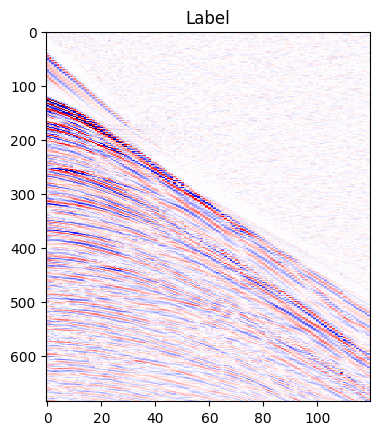

In [26]:
plt.imshow(np.rot90(np.flip(data_noise_norm.T.squeeze() -data_noise_norm.T.mean(),axis=0)), 
             aspect=0.2, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
plt.title("Label")

Text(0.5, 1.0, 'Label')

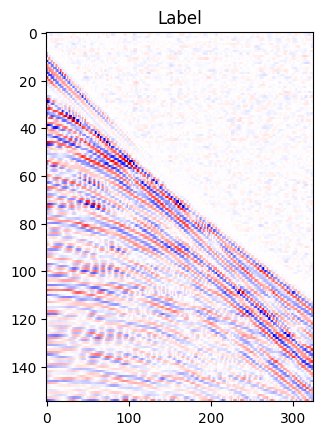

In [27]:
plt.imshow(dataset['inputs'][0].squeeze() -dataset['inputs'][0].mean(), 
             aspect=2.9, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
plt.title("Label")
    

Text(0.5, 1.0, 'Label')

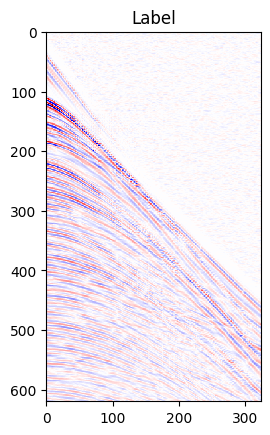

In [28]:
plt.imshow(dataset['labels'][0].squeeze() -dataset['labels'][0].mean(), 
             aspect=0.9, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
plt.title("Label")
    

Text(0.5, 1.0, 'Label')

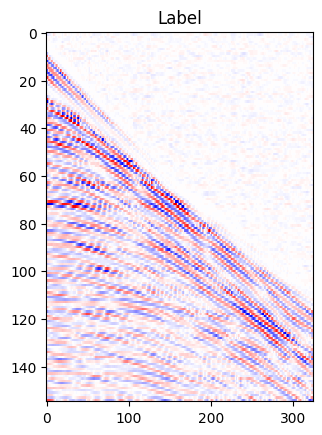

In [29]:
plt.imshow(F.interpolate(x, size=(155, 324), mode='bilinear', align_corners=False).squeeze() - 
           F.interpolate(x, size=(155, 324), mode='bilinear', align_corners=False).squeeze().mean(), 
             aspect=2.9, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
plt.title("Label")

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F
class ConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(ConvBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.block(x)

        

class UNetPP(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, base_channels=64):
        super(UNetPP, self).__init__()

        self.pool = nn.MaxPool2d(kernel_size=(2, 1))

        # Encoder blocks
        self.x00 = ConvBlock(in_channels, base_channels)
        self.x10 = ConvBlock(base_channels, base_channels * 2)
        self.x20 = ConvBlock(base_channels * 2, base_channels * 4)
        self.x30 = ConvBlock(base_channels * 4, base_channels * 8)

        # Upsample layers (ConvTranspose2d for height-only doubling)
        self.up_x10 = nn.ConvTranspose2d(base_channels * 2, base_channels * 2, kernel_size=(2, 1), stride=(2, 1),  output_padding=(1, 0))
        self.up_x20 = nn.ConvTranspose2d(base_channels * 4, base_channels * 4, kernel_size=(2, 1), stride=(2, 1), output_padding=(1, 0))
        self.up_x30 = nn.ConvTranspose2d(base_channels * 8, base_channels * 8, kernel_size=(2, 1), stride=(2, 1), output_padding=(1, 0))
        
        self.up_x11 = nn.ConvTranspose2d(base_channels * 2, base_channels * 2, kernel_size=(2, 1), stride=(2, 1),  output_padding=(1, 0))
        self.up_x21 = nn.ConvTranspose2d(base_channels * 4, base_channels * 4, kernel_size=(2, 1), stride=(2, 1), output_padding=(1, 0))
        
        self.up_x12 = nn.ConvTranspose2d(base_channels * 2, base_channels * 2, kernel_size=(2, 1), stride=(2, 1), output_padding=(1, 0))

        # Decoder blocks with dense skip connections
        self.x01 = ConvBlock(base_channels + base_channels * 2, base_channels)
        self.x11 = ConvBlock(base_channels * 2 + base_channels * 4, base_channels * 2)
        self.x21 = ConvBlock(base_channels * 4 + base_channels * 8, base_channels * 4)

        self.x02 = ConvBlock(base_channels * 2 + base_channels, base_channels)
        self.x12 = ConvBlock(base_channels * 4 + base_channels * 2, base_channels * 2)

        self.x03 = ConvBlock(base_channels * 3, base_channels)

        # Final upsampling: 155 → 620
        self.final_upsampler = nn.Sequential(
            nn.ConvTranspose2d(base_channels, base_channels, kernel_size=(4, 1), stride=(2, 1), padding=(2, 0)),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(base_channels, base_channels, kernel_size=(4, 1), stride=(2, 1), padding=(2, 0) ),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(base_channels, base_channels, kernel_size=(9, 1), stride=(1, 1), padding=(1, 0)),
            nn.ReLU(inplace=True),
            nn.Conv2d(base_channels, out_channels, kernel_size=1),
        )

    def crop_to_match(self, src, tgt):
        """Crop `src` tensor to match the size of `tgt`."""
        h_src, h_tgt = src.shape[2], tgt.shape[2]
        diff = h_src - h_tgt
        #print(diff)
        if diff > 0:
            src = src[:, :, :-diff, :]
        return src

    def forward(self, x):
        # Encoder
        x00 = self.x00(x)
        x10 = self.x10(self.pool(x00))
        x20 = self.x20(self.pool(x10))
        x30 = self.x30(self.pool(x20))
        #print("x10 upsampled:", self.up_x10(x10).shape, "| x00:", x00.shape)
        #print("x20 upsampled:", self.up_x20(x20).shape, "| x10:", x10.shape)
        #print("x30 upsampled:", self.up_x30(x30).shape, "| x20:", x20.shape)
        
        
        # Decoder with ConvTranspose2d upsampling
        x10_up = self.crop_to_match(self.up_x10(x10), x00)
        x01 = self.x01(torch.cat([x00, x10_up], dim=1))
        #print("x01 upsampled:", x10_up.shape, "| x00:", x00.shape)
        
        x20_up = self.crop_to_match(self.up_x20(x20), x10)
        x11 = self.x11(torch.cat([x10, x20_up], dim=1))

        x30_up = self.crop_to_match(self.up_x30(x30), x20)
        x21 = self.x21(torch.cat([x20, x30_up], dim=1))

        x11_up = self.crop_to_match(self.up_x11(x11), x01)
        x02 = self.x02(torch.cat([x01, x11_up], dim=1))

        x21_up = self.crop_to_match(self.up_x21(x21), x11)
        x12 = self.x12(torch.cat([x11, x21_up], dim=1))

        x12_up = self.crop_to_match(self.up_x12(x12), x02)
        x03 = self.x03(torch.cat([x02, x12_up], dim=1))

        #print("x11 upsampled:", self.up_x11(x11).shape, "| x01:", x01.shape)
        #print("x21 upsampled:", self.up_x21(x21).shape, "| x11:", x11.shape)
        #print("x12 upsampled:", self.up_x12(x12).shape, "| x02:", x02.shape)


        

        out = self.final_upsampler(x03)
        #print(out.shape)
        #out = F.interpolate(out, size=(620, 324), mode='bilinear', align_corners=False)

        assert out.shape[2] == 620 and out.shape[3] == 324, f"Expected (620, 324), got {out.shape[2:]}"
        return out

class UNet2D(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, base_channels=64):
        super(UNet2D, self).__init__()

        # Encoder
        self.enc1 = self.conv_block(in_channels, base_channels)
        self.enc2 = self.conv_block(base_channels, base_channels * 2)
        self.enc3 = self.conv_block(base_channels * 2, base_channels * 4)

        # Downsampling
        self.pool = nn.MaxPool2d(kernel_size=(2, 1))  # downsample height only

        # Bottleneck
        self.bottleneck = self.conv_block(base_channels * 4, base_channels * 8)

        # Decoder
        self.up3 = self.up_block(base_channels * 8, base_channels * 4)
        self.up2 = self.up_block(base_channels * 4, base_channels * 2)
        self.up1 = self.up_block(base_channels * 2, base_channels)

        # Final upsampling from 155 → 620 (×4)
        self.final_upsampler = nn.Sequential(
    nn.ConvTranspose2d(base_channels, base_channels, kernel_size=(4, 1), stride=(2, 1), padding=(1, 0),output_padding=(1,0)),
    nn.ReLU(inplace=True),
    nn.ConvTranspose2d(base_channels, base_channels, kernel_size=(4, 1), stride=(2, 1), padding=(1, 0),output_padding=(1,0)),
    nn.ReLU(inplace=True),
    nn.ConvTranspose2d(base_channels, base_channels, kernel_size=(9, 1), stride=(1, 1), padding=(0, 0)),  # 611 → 619
    nn.ReLU(inplace=True),
    nn.Conv2d(base_channels, out_channels, kernel_size=1),
)

    def conv_block(self, in_ch, out_ch):
        return nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def up_block(self, in_ch, out_ch):
        return nn.Sequential(
            nn.ConvTranspose2d(in_ch, out_ch, kernel_size=(2, 1), stride=(2, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)       # [B, C, 155, 324]
        p1 = self.pool(e1)      # 77
        e2 = self.enc2(p1)
        p2 = self.pool(e2)      # 38
        e3 = self.enc3(p2)
        p3 = self.pool(e3)      # 19

        # Bottleneck
        b = self.bottleneck(p3)

        # Decoder
        d3 = self.up3(b)        # 19 → 38
        d3 = self.crop_and_add(d3, e3)

        d2 = self.up2(d3)       # 38 → 77
        d2 = self.crop_and_add(d2, e2)

        d1 = self.up1(d2)       # 77 → 155
        d1 = self.crop_and_add(d1, e1)
        #print("d1 shape:", d1.shape)
        
        # Final upsampling 155 → 620
        out = self.final_upsampler(d1)  # [B, 1, 620, 324]
        out = F.interpolate(out, size=(620, 324), mode='bilinear', align_corners=False)
        assert out.shape[2] == 620 and out.shape[3] == 324, f"Expected (620,324), got {out.shape[2:]}"
        return out

    def crop_and_add(self, a, b):
        diff = a.shape[2] - b.shape[2]
        if diff > 0:
            a = a[:, :, :-diff, :]
        elif diff < 0:
            b = b[:, :, :a.shape[2], :]
        return a + b




In [31]:
class SeismicAugmentations:
    def __init__(self, 
                 noise_std_range=(0, 0.12), 
                 missing_traces_range=(0, 120),
                 polarity_prob=0.5,
                 vertical_shift_ratio_up=0.03,
                 vertical_shift_ratio_down=0.07,
                 shift_fill_value='default', apply_shift=True):
        self.noise_std_range = noise_std_range
        self.missing_traces_range = missing_traces_range
        self.polarity_prob = polarity_prob
        self.vertical_shift_ratio_up = vertical_shift_ratio_up
        self.vertical_shift_ratio_down = vertical_shift_ratio_down
        self.shift_fill_value = shift_fill_value
        self.apply_shift = apply_shift

    def transform_pair(self, x_input, x_label):
        x_input = x_input.clone()
        x_label = x_label.clone()
        h, w = x_input.shape

        if self.shift_fill_value == 'default':
            current_value = x_label[ 0:4, w // 3:].mean()#.item()
            #self._cached_dataset_mean = current_value
        elif self.shift_fill_value == 'mean':
            current_value = x_label.mean().item()
            self._cached_dataset_mean = current_value
        else:
            current_value = self.shift_fill_value
        
        invert_polarity = random.random() < self.polarity_prob
        if invert_polarity:
            current_value = -current_value
        max_shift_up = int(h * self.vertical_shift_ratio_up)
        max_shift_down = int(h * self.vertical_shift_ratio_down)

        if max_shift_up + max_shift_down == 0:
            shift = 0
        else:
            if random.random() < 0.15:
                shift = 0 # -random.randint(1, max_shift_up)
            else:
                shift = random.randint(1, max_shift_down)

        # --- Shift e polarità (comuni) ---
        if self.apply_shift:
            x_input = self._apply_shift_and_polarity(x_input, invert_polarity, shift,current_value)
            x_label = self._apply_shift_and_polarity(x_label, invert_polarity, shift * 4,current_value)
        elif invert_polarity:
            x_input = -x_input
            x_label = -x_label
                

        # --- Rumore (solo input) ---
        std = random.uniform(*self.noise_std_range)
        x_input += torch.randn_like(x_input) * std

        # --- Tracce mancanti (solo input) ---
        def normalize_minmax(x):
            return 2 * (x - x.min()) / (x.max() - x.min() + 1e-6) - 1

        
        #x_input = normalize_minmax(x_input)
        #x_label = normalize_minmax(x_label)

        num_missing = random.randint(*self.missing_traces_range)
        if num_missing > 0:
            missing_idx = random.sample(range(w), num_missing)
            noise = torch.randn(( h, num_missing ))
            x_input[:, missing_idx] = current_value
                  
        
        

        return x_input, x_label

    def _apply_shift_and_polarity(self, x, invert_polarity, shift, fill_value):
        h = x.shape[0]

        # Inversione di polarità
        if invert_polarity:
            x = -x
        # Shift con riempimento costante
        if shift != 0:
            if shift > 0:  # shift verso il basso
                pad = (0, 0, shift, 0)
                x = F.pad(x, pad, mode='constant', value=fill_value)
                x = x[:h, :]
            else:  # shift verso l'alto
                pad = (0, 0, 0, -shift)
                x = F.pad(x, pad, mode='constant', value=fill_value)
                x = x[-shift:, :]
        return x
from torch.utils.data import Dataset


class SeismicDataset(Dataset):
    def __init__(self, inputs, labels, augmentations=None, augment_labels=True):
        """
        Args:
            inputs (np.ndarray or torch.Tensor): shape [N, H, W]
            labels (np.ndarray or torch.Tensor): shape [N, 4*H, W]
            augmentations (SeismicAugmentations): augmentation object
            augment_labels (bool): whether to apply augmentation (True for training)
        """
        self.inputs = torch.from_numpy(inputs).float() if isinstance(inputs, np.ndarray) else inputs.float()
        self.labels = torch.from_numpy(labels).float() if isinstance(labels, np.ndarray) else labels.float()
        self.augmentations = augmentations
        self.augment_labels = augment_labels

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        x_input = self.inputs[idx]    # [H, W]
        x_label = self.labels[idx]    # [4*H, W]
    
        if self.augmentations and self.augment_labels:
            x_input, x_label = self.augmentations.transform_pair(x_input, x_label)
    
        # Add channel dimension: [1, H, W]
        x_input = x_input.unsqueeze(0)
        x_label = x_label.unsqueeze(0)  # solo se il modello richiede 1 canale anche in output
    
        return x_input, x_label

In [32]:
#inputs.squeeze(1).squeeze(1).shape

/tmp/ipykernel_946405/4007572313.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs)
/tmp/ipykernel_946405/4007572313.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)
/tmp/ipykernel_946405/4007572313.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  original_input = torch.tensor(original_input)#.to('cuda')
/tmp/ipykernel_946405/4007572313.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().det

<Figure size 1200x300 with 0 Axes>

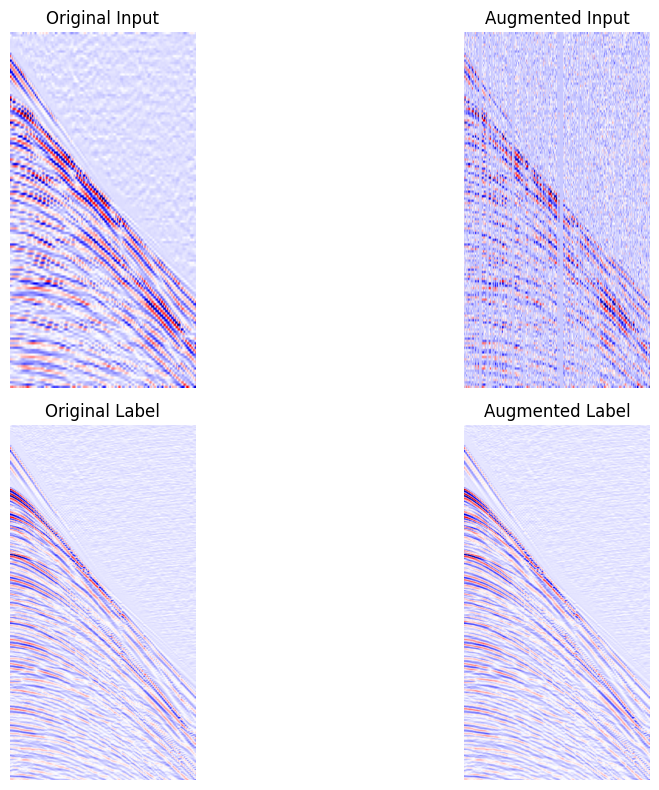

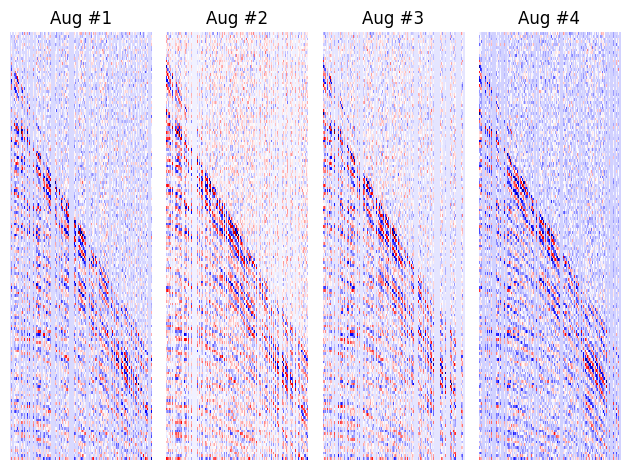

In [33]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
import random
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# Set seed for reproducibility
seed = 20
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Concatenazione dei dati
inputs = dataset['inputs'].squeeze(1).squeeze(1)
labels = dataset['labels'].squeeze(1).squeeze(1)

# Converti tutto in tensori
inputs = torch.tensor(inputs)
labels = torch.tensor(labels)

# Shuffle indices
indices = torch.randperm(len(labels))

# Split ratio
split_ratio = 0.0
split_idx = int(len(labels) * split_ratio)

# Train/val split
train_idx, val_idx = indices[:split_idx], indices[split_idx:]
train_inputs, val_inputs = inputs[train_idx], inputs[val_idx]
train_labels, val_labels = labels[train_idx], labels[val_idx]

# Augmentatore
#augment = SeismicAugmentations(apply_shift=True)
val_augment = SeismicAugmentations(noise_std_range=(0.06, 0.06),missing_traces_range=(120, 120), apply_shift=False,polarity_prob=0.5)
# Dataloader
#train_ds = SeismicDataset(train_inputs, train_labels, augmentations=augment, augment_labels=True)
val_ds = SeismicDataset(val_inputs, val_labels, augmentations=val_augment, augment_labels=True)  # No augmentation in val

#train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=1)
n = 4
vmin_all = -1
vmax_all = 1
plt.figure(figsize=(12, 3))

idx = random.randint(0, inputs.shape[0] - 1)
original_input = inputs[idx]   # [155, 324]
original_label = labels[idx]   # [620, 324]
original_input = torch.tensor(original_input)#.to('cuda')
original_label = torch.tensor(original_label)#.to('cuda')
aug_input, aug_label = val_augment.transform_pair(original_input, original_label)

# Visualizza
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original Input")
plt.imshow(original_input.numpy(), cmap='seismic',aspect=4)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Augmented Input")
plt.imshow(aug_input.numpy(), cmap='seismic', aspect=4)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Label")
plt.imshow(original_label.numpy(), cmap='seismic',aspect=1)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Augmented Label")
plt.imshow(aug_label.numpy(), cmap='seismic', aspect=1)
plt.axis('off')

plt.tight_layout()
plt.show()





for i in range(n):
    aug_input, _ = val_augment.transform_pair(original_input, original_label)

    plt.subplot(1, n, i+1)
    plt.title(f"Aug #{i+1}")
    plt.imshow(aug_input.numpy(), cmap='seismic', interpolation='none', aspect='auto')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [34]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model, loss, optimizer
model = UNetPP().to(device)
model.load_state_dict(torch.load("best_unetPP2_aug_model_superresolution_denoising_interpolation.pth"))

<All keys matched successfully>

 Val Loss: 0.010180
 Val Loss: 0.010799
 Val Loss: 0.009863


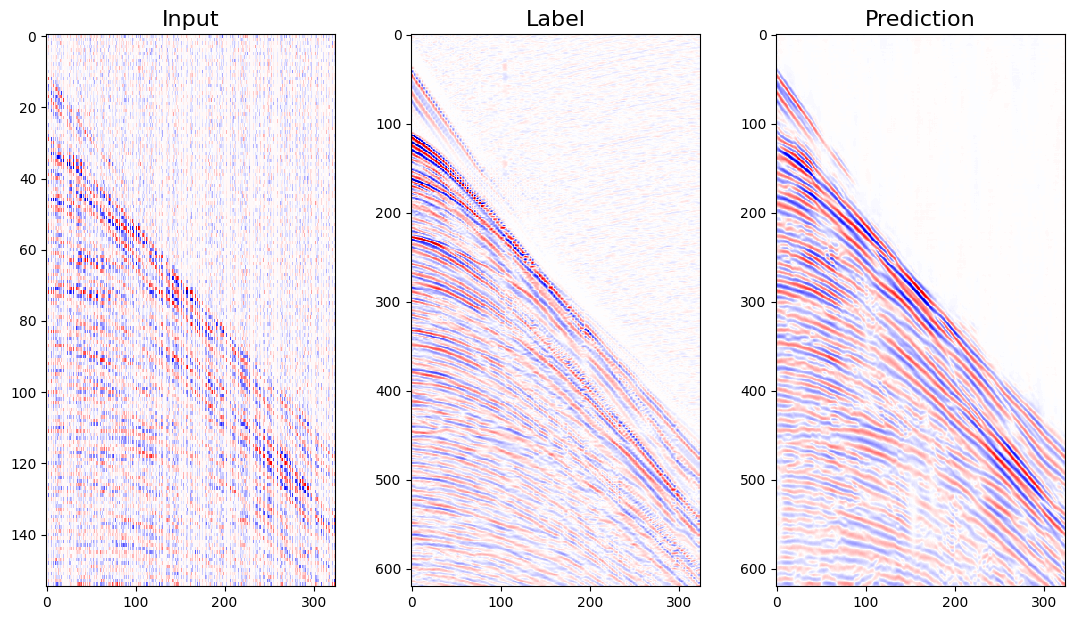

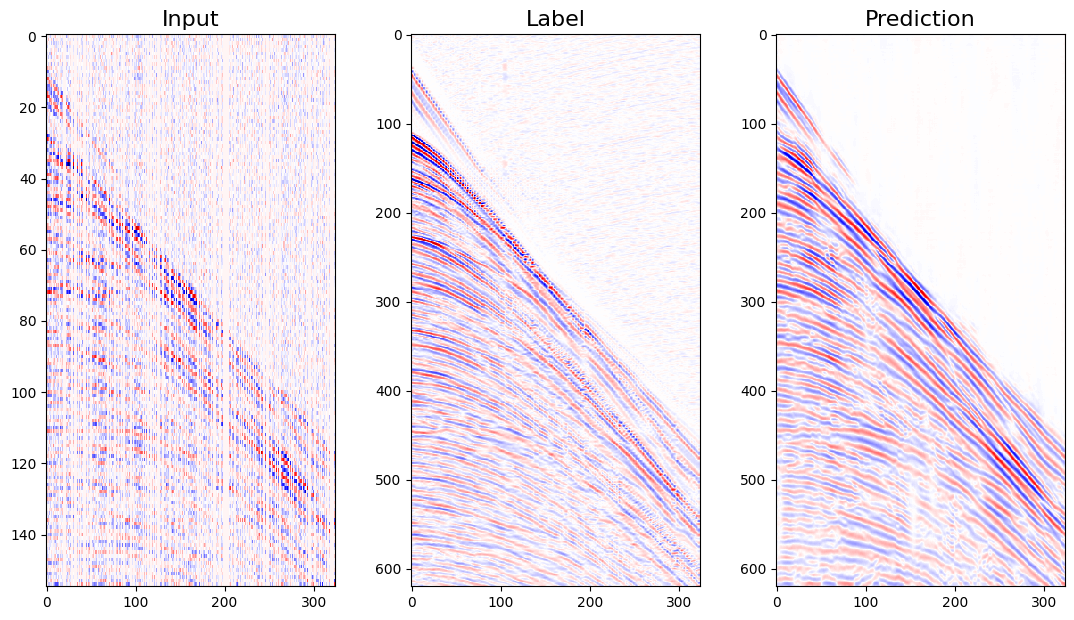

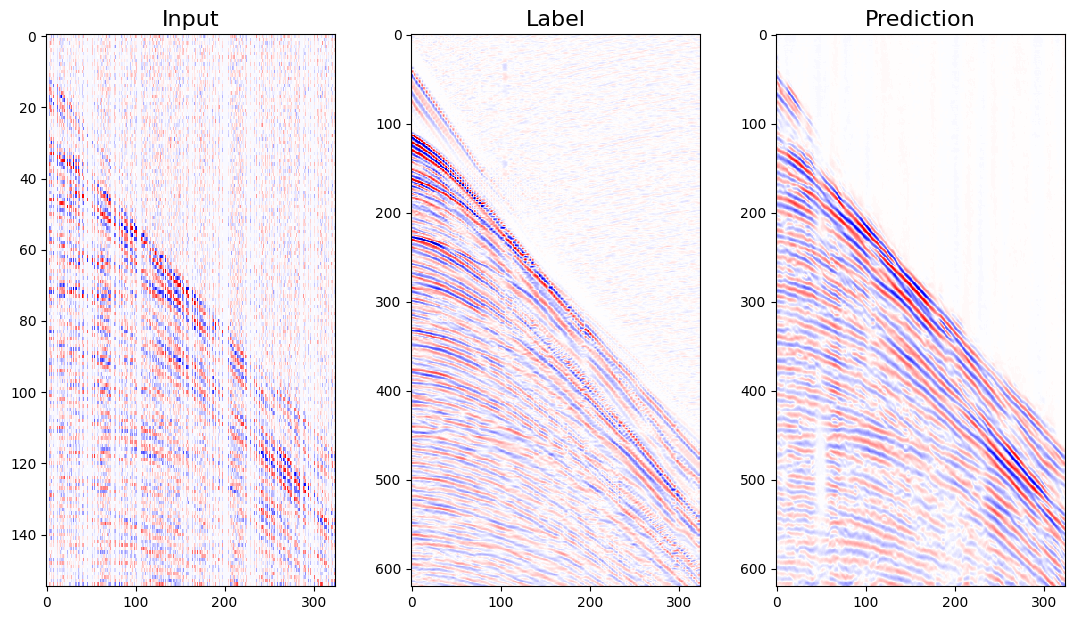

In [35]:
import random
import matplotlib.pyplot as plt

model.eval() 
norm_max = 1
norm_min = -1
vmin_all = -1
vmax_all = 1

val_losses = []
criterion = nn.MSELoss()
with torch.no_grad():
    total_val_loss = 0.0  # Initialize loss accumulator
    for x_batch, y_batch in val_loader:
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        output = model(x_batch)
        loss = criterion(output, y_batch)

        total_val_loss += loss.item() * x_batch.size(0)

    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)

    print(f" Val Loss: {avg_val_loss:.6f}")

    # Plot last batch with tighter spacing
    f, ax = plt.subplots(1, 3, figsize=(11, 6))
    ax[0].imshow(x_batch.cpu().squeeze() - x_batch.cpu().squeeze().mean(), 
                 aspect=4, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[0].set_title("Input",fontsize=16)
    
    ax[1].imshow(y_batch.cpu().squeeze() - y_batch.cpu().squeeze().mean(), 
                 aspect=1, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[1].set_title("Label",fontsize=16)
    
    ax[2].imshow(output.cpu().squeeze() - output.cpu().squeeze().mean(), 
                 aspect=1, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[2].set_title("Prediction",fontsize=16)
    
    plt.tight_layout(pad=0.0, w_pad=0.0)  # tighter spacing between subplots
    #plt.show()
    #plt.savefig(f"figures/1_6_120_all.png", dpi=300, bbox_inches='tight')

# --- Now, load and use model2 ---
model2 = UNetPP().to(device)
model2.load_state_dict(torch.load('best_unetPP2_aug_real_noise_model_superresolution_denoising_interpolation.pth'))
model2.eval()

val_losses = []
# Evaluate model2
with torch.no_grad():
    total_val_loss = 0.0
    for x_batch, y_batch in val_loader:
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        output2 = model2(x_batch)
        loss = criterion(output2, y_batch)

        total_val_loss += loss.item() * x_batch.size(0)

    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)

    print(f" Val Loss: {avg_val_loss:.6f}")
    # Plot last batch with tighter spacing
    f, ax = plt.subplots(1, 3, figsize=(11, 6))
    ax[0].imshow(x_batch.cpu().squeeze() - x_batch.cpu().squeeze().mean(), 
                 aspect=4, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[0].set_title("Input",fontsize=16)
    
    ax[1].imshow(y_batch.cpu().squeeze() - y_batch.cpu().squeeze().mean(), 
                 aspect=1, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[1].set_title("Label",fontsize=16)
    
    ax[2].imshow(output.cpu().squeeze() - output.cpu().squeeze().mean(), 
                 aspect=1, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[2].set_title("Prediction",fontsize=16)
    
    plt.tight_layout(pad=0.0, w_pad=0.0)  # tighter spacing between subplots
    #plt.show()
    #plt.savefig(f"figures/2_6_120_all.png", dpi=300, bbox_inches='tight')

          # Remove 'break' if you want to evaluate all batches  
val_losses = []
criterion = nn.MSELoss()
model3 = UNet2D().to(device)
model3.load_state_dict(torch.load("best_unet_model_superresolution_denoising_interpolation2.pth"))#best_unet_model_superresolution_denoising_interpolation.pth"))
with torch.no_grad():
    total_val_loss = 0.0  # Initialize loss accumulator
    for x_batch, y_batch in val_loader:
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        
        output = model3(x_batch)
        loss = criterion(output, y_batch)

        total_val_loss += loss.item() * x_batch.size(0)

    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)

    print(f" Val Loss: {avg_val_loss:.6f}")

    # Plot last batch with tighter spacing
    f, ax = plt.subplots(1, 3, figsize=(11, 6))
    ax[0].imshow(x_batch.cpu().squeeze() - x_batch.cpu().squeeze().mean(), 
                 aspect=4, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[0].set_title("Input",fontsize=16)
    
    ax[1].imshow(y_batch.cpu().squeeze() - y_batch.cpu().squeeze().mean(), 
                 aspect=1, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[1].set_title("Label",fontsize=16)
    
    ax[2].imshow(output.cpu().squeeze() - output.cpu().squeeze().mean(), 
                 aspect=1, vmin=vmin_all, vmax=vmax_all, cmap='seismic', interpolation='none')
    ax[2].set_title("Prediction",fontsize=16)
    
    plt.tight_layout(pad=0.0, w_pad=0.0)  # tighter spacing between subplots
    #plt.show()
    #plt.savefig(f"figures/3_6_120_all.png", dpi=300, bbox_inches='tight')